In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
segmentation = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
segmentation

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


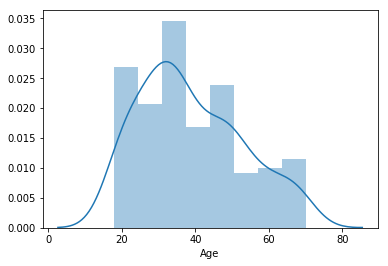

In [4]:
sns.distplot(segmentation['Age'], kde = True, hist = True)

This distribution is unimodal and skewed to the right(skewed towards higher ages).

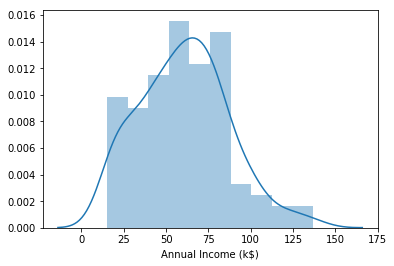

In [5]:
sns.distplot(segmentation['Annual Income (k$)'], kde = True, hist = True)

This distribution is roughly bimodal and skewed to the right(skewed towards higher annual incomes). However, the majority of annual income values lie between around 18k to 85k in dollars.

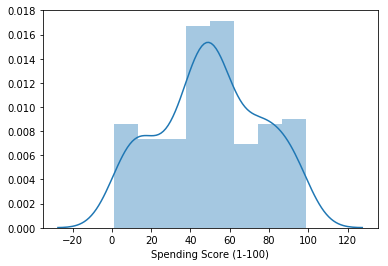

In [6]:
sns.distplot(segmentation['Spending Score (1-100)'], kde = True, hist = True)

This distribution is bimodal and roughly symmetric. The histogram spans from the left boundary of the leftmost bar corresponding to spending score 0, towards the right boundary of the rightmost bar, corresponding to a spending score of approximately 100.

Is there a statistically significant difference in age between males and females in this mall?

In [8]:
average_age = segmentation.loc[:, ['Gender', 'Age']].groupby('Gender', as_index = False).agg(np.mean)
average_age

,Gender,Age
0,Female,38.098214
1,Male,39.806818


Null Hypothesis: The ages of males and females in the mall come from the same underlying distribution. The average age of Males is the same as the average age of Females in the Mall(there is no statistically significant difference).

Alternative Hypothesis: The ages of males and females in the mall come from different distributions. The average age of Males is greater than the average age of Females in the Mall

Test Statistic: Average age of Males - Average age of Females

In [12]:
observed_difference = average_age['Age'][1] - average_age['Age'][0]
observed_difference

1.7086038961038952

Text(0, 0.5, 'Percent per Average Age of Males in Mall minus Average Age of Females in Mall')

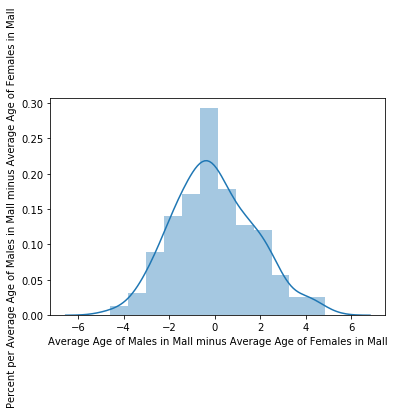

In [19]:
num_iterations = 200
simulated_test_statistic_values = np.empty(num_iterations)
for i in np.arange(num_iterations):
    shuffled_gender = segmentation.sample(len(segmentation), replace = False).iloc[:, 1].to_frame().reset_index(drop=True)
    segmentation['Shuffled Gender'] = shuffled_gender['Gender']
    age_average = segmentation[['Shuffled Gender', 'Age']].groupby('Shuffled Gender').agg(np.mean)
    simulated_test_statistic_value = age_average['Age'][1] - age_average['Age'][0]
    simulated_test_statistic_values[i] = simulated_test_statistic_value
    
simulated_test_statistic_values = pd.Series(simulated_test_statistic_values)
sns.distplot(simulated_test_statistic_values, kde = True)
plt.xlabel("Average Age of Males in Mall minus Average Age of Females in Mall")
plt.ylabel("Percent per Average Age of Males in Mall minus Average Age of Females in Mall")



In [29]:
p_value = np.count_nonzero(simulated_test_statistic_values >= observed_difference)/len(simulated_test_statistic_values)
p_value

0.18

With a large p-value of 0.18 which is larger than the p-value cutoff of 0.05, we fail to reject the null hypothesis. There is sufficient evidence to conclude that the ages of males and females in the mall come from the same underlying distribution. The average age of Males is the same as the average age of Females in the Mall(there is no statistically significant difference).

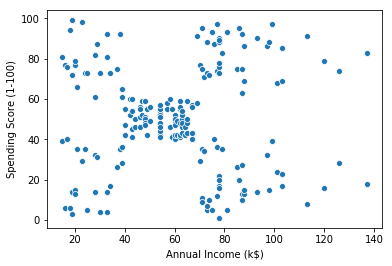

In [30]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data = segmentation)

There doesn't appear to be any association between Annual Income in thousands of dollars and Spending Score(1-100). However heteroskedacity does occur.

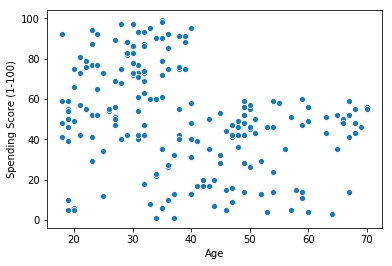

In [42]:
sns.scatterplot('Age', 'Spending Score (1-100)', data = segmentation)

There is a weak negative linear association between Spending Score(the response variable), and Age(the explanatory variable). However, it can be observed, that generally speaking, older people tend to spend less(36 years or higher) than those who are younger(36 or lower) on average.

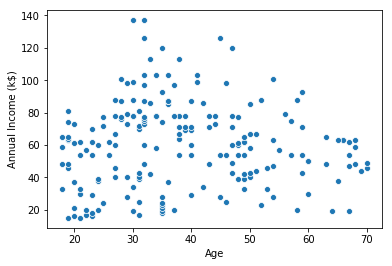

In [43]:
sns.scatterplot('Age','Annual Income (k$)', data = segmentation)

There appears to be no association between Age and Annual Income.

Is there a statistically significant difference in annual income between males and females in this mall?

In [31]:
average_income = segmentation.loc[:, ['Gender', 'Annual Income (k$)']].groupby('Gender', as_index = False).agg(np.mean)
average_income

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


Null Hypothesis: The annual incomes of males and females in the mall come from the same underlying distribution. The average annual income of Males is the same as the average annual income of Females in the Mall(there is no statistically significant difference).

Alternative Hypothesis: The annual incomes of males and females in the mall come from different distributions. The average annual income of Males is greater than the average annual income of Females in the Mall

Test Statistic: Average annual income of Males - Average annual Income of Females

In [33]:
observed_difference = average_income['Annual Income (k$)'][1] - average_income['Annual Income (k$)'][0]
observed_difference

2.9772727272727266

Text(0, 0.5, 'Percent per Average Annual Income of Males in Mall minus Average Annual Income of Females in Mall')

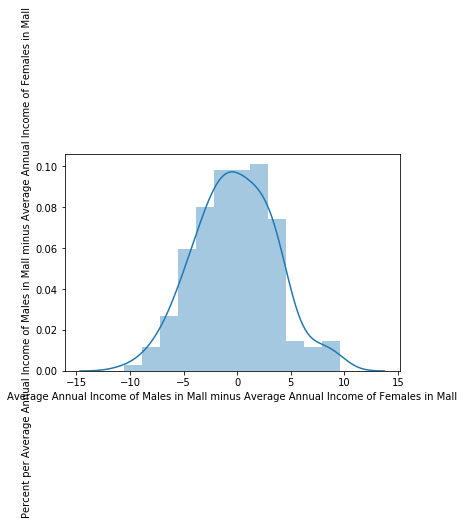

In [37]:
num_iterations = 200 #num iterations equivalent to number of values in the sample for convenience
simulated_test_statistic_values = np.empty(num_iterations)
for i in np.arange(num_iterations):
    shuffled_gender = segmentation.sample(len(segmentation), replace = False).iloc[:, 1].to_frame().reset_index(drop=True)
    segmentation['Shuffled Gender'] = shuffled_gender['Gender']
    income_average = segmentation[['Shuffled Gender', 'Annual Income (k$)']].groupby('Shuffled Gender').agg(np.mean)
    simulated_test_statistic_value = income_average['Annual Income (k$)'][1] - income_average['Annual Income (k$)'][0]
    simulated_test_statistic_values[i] = simulated_test_statistic_value
    
simulated_test_statistic_values = pd.Series(simulated_test_statistic_values)
sns.distplot(simulated_test_statistic_values, kde = True)
plt.xlabel("Average Annual Income of Males in Mall minus Average Annual Income of Females in Mall")
plt.ylabel("Percent per Average Annual Income of Males in Mall minus Average Annual Income of Females in Mall")



In [38]:
p_value = np.count_nonzero(simulated_test_statistic_values >= observed_difference)/len(simulated_test_statistic_values)
p_value

0.195

With a large p-value of 0.195 which is larger than the p-value cutoff of 0.05, we fail to reject the null hypothesis. There is sufficient evidence to conclude that the annual incomes of males and females in the mall come from the same underlying distribution. The average annual income of Males is the same as the average annual income of Females in the Mall(there is no statistically significant difference).

Is there a statistically significant difference in the average spending score between males and females in this mall?

In [39]:
average_spending_score = segmentation.loc[:, ['Gender', 'Spending Score (1-100)']].groupby('Gender', as_index = False).agg(np.mean)
average_spending_score

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


Null Hypothesis: The spending scores of males and females in the mall come from the same underlying distribution. The average spending score of Males is the same as the average spending score of Females in the Mall(there is no statistically significant difference).

Alternative Hypothesis: The spending scores of males and females in the mall come from different distributions. The average spending score of Females is greater than the average spending score of Males in the Mall

Test Statistic: Average spending score of Females - Average spending score of Males

Text(0, 0.5, 'Percent per Average Spending Score of Females in Mall minus Average Spending Score of Males in Mall')

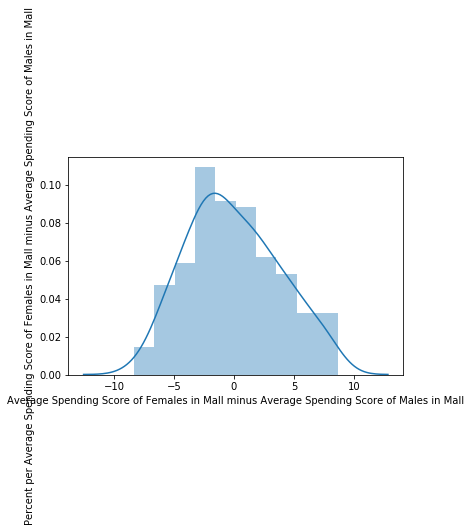

In [44]:
num_iterations = 200 #num iterations equivalent to number of values in the sample for convenience
simulated_test_statistic_values = np.empty(num_iterations)
for i in np.arange(num_iterations):
    shuffled_gender = segmentation.sample(len(segmentation), replace = False).iloc[:, 1].to_frame().reset_index(drop=True)
    segmentation['Shuffled Gender'] = shuffled_gender['Gender']
    spending_score_average = segmentation[['Shuffled Gender', 'Spending Score (1-100)']].groupby('Shuffled Gender').agg(np.mean)
    simulated_test_statistic_value = spending_score_average['Spending Score (1-100)'][0] - spending_score_average['Spending Score (1-100)'][1]
    simulated_test_statistic_values[i] = simulated_test_statistic_value
    
simulated_test_statistic_values = pd.Series(simulated_test_statistic_values)
sns.distplot(simulated_test_statistic_values, kde = True)
plt.xlabel("Average Spending Score of Females in Mall minus Average Spending Score of Males in Mall")
plt.ylabel("Percent per Average Spending Score of Females in Mall minus Average Spending Score of Males in Mall")


In [45]:
p_value = np.count_nonzero(simulated_test_statistic_values >= observed_difference)/len(simulated_test_statistic_values)
p_value

0.23

With a large p-value of 0.23 which is larger than the p-value cutoff of 0.05, we fail to reject the null hypothesis. There is sufficient evidence to conclude that the spending scores of males and females in the mall come from the same underlying distribution. The average spending score of Males is the same as the average spending score of Females in the Mall(there is no statistically significant difference).

Overall, through this analysis, it can be concluded that there are no statistically differences between the populations of males and females who shop in the mall, in regards to their age, income and spending score. Additionally, there was no association between annual income and spending score, which invalidates any assumptions in regards to individuals earning more, and thus spending more in the mall. Finally, older individuals(older than around 36 years of age) tended to spend less than average(witnessed by their lower on average spending scores on the scatterplot) than those younger than around 36 years of age. 